<a href="https://colab.research.google.com/github/danilsocol/ml-homework/blob/main/homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import plotly.express as px

%matplotlib inline

In [ ]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller 
import warnings
warnings.filterwarnings('ignore')

# Imputing with KNNImputer
from sklearn.impute import KNNImputer

In [ ]:
df = pd.read_csv('/content/sample_data/home_date_miss_values.csv', sep=';')

df['value'] = df['value'].fillna(method="ffill")
df['date'] = pd.to_datetime(df['date'])
df = df[df.date > pd.to_datetime('2022-05-30')]
df.sample(5)

,date,value
785,2022-07-24,22264.6
797,2022-08-05,22592.5
1057,2023-04-22,27137.5
936,2022-12-22,16565.9
742,2022-06-11,28095.9


In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['value'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.962177
p-value: 0.303399
Critical Values:
	1%: -3.448
	5%: -2.870
	10%: -2.571


Так как p-value больше 0.05 то ряд нестанционарный

In [ ]:
if result[1] > 0.05:
  df['value'] = df['value'].diff()

In [ ]:
fig = px.line(df, x="date", y="value", title='values for date')
fig.show()


# EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 731 to 1095
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    365 non-null    datetime64[ns]
 1   value   364 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.6 KB


In [ ]:
df.describe()

,value
count,364.000000
mean,-9.955769
std,648.122642
min,-4576.100000
25%,-211.425000
50%,37.650000
75%,251.775000
max,2183.200000


In [ ]:
df.value

731        NaN
732    -1855.1
733      244.2
734     -317.8
735      195.1
         ...  
1091     473.0
1092     216.8
1093     233.9
1094     761.3
1095       9.8
Name: value, Length: 365, dtype: float64

In [ ]:
df = df.fillna(0)
df.sample(5)

,date,value
780,2022-07-19,830.7
953,2023-01-08,2.8
956,2023-01-11,158.4
798,2022-08-06,333.5
887,2022-11-03,-9.8


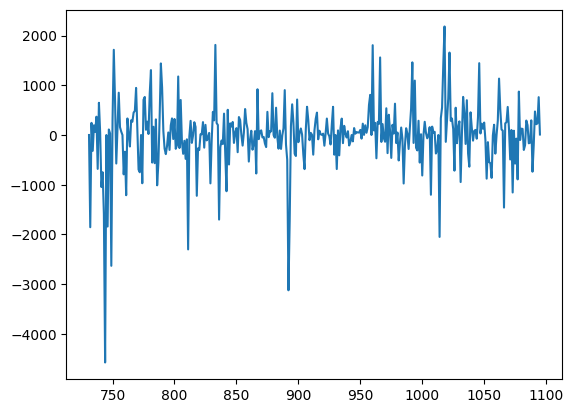

In [ ]:
plt.plot(df['value'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 731 to 1095
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    365 non-null    datetime64[ns]
 1   value   365 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.6 KB


In [ ]:
train_df = df[df.date < pd.to_datetime('2023-05-01')]
test_df = df[df.date >= pd.to_datetime('2023-05-01')]
print(len(train_df),len(test_df))

335 30


In [ ]:
train_df.shape

(335, 2)

In [ ]:
test_df.shape

(30, 2)

In [ ]:
# Moving Avarage
AR = AutoReg(train_df.value.values, lags=20)
AR_model = AR.fit()

In [ ]:
AR_model.predict(start=len(train_df),
                 end=len(train_df) + len(test_df)-1)

array([-138.85795706,    3.86308098, -132.13462421,  -12.86822798,
       -109.52258862,  -62.8406492 ,   34.05290258,    1.1099482 ,
        144.20911514,  129.36880977,  153.25045798,   38.47828398,
          7.13532967,   54.4887976 ,   73.47656703,    9.02950702,
        -83.5015595 ,  -28.7934893 ,   -8.70928716,   21.82655715,
         39.3233044 ,   41.90753254,   50.0452909 ,   33.75883284,
         49.5013873 ,   37.92957426,   47.33373581,   32.77189304,
         16.11939588,   13.36490305])

In [ ]:
test_df['AR_model_prediction'] = AR_model.predict(start =len(train_df),
                                                  end= len(train_df) + len(test_df)-1)

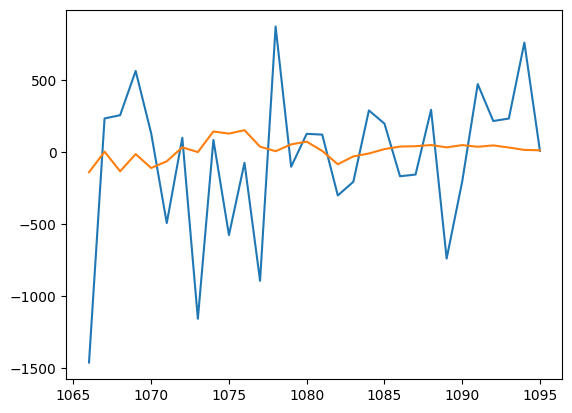

In [ ]:
plt.plot(test_df[['value', 'AR_model_prediction']])

In [ ]:
from sklearn.metrics import mean_absolute_error

print('MAE MA_model: ', mean_absolute_error(test_df['value'],
                                            test_df['AR_model_prediction']))


MAE MA_model:  387.2139537118013


In [ ]:
from sklearn.metrics import mean_squared_error
print('RMSE MA_model: ', mean_squared_error(test_df['value'],
                                            test_df['AR_model_prediction'])**0.5)

RMSE MA_model:  512.8328802118197
